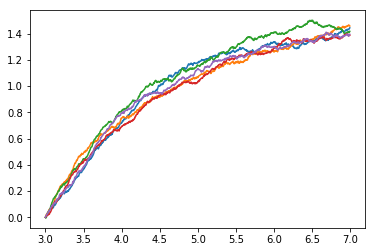

In [3]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt

num_sims = 5 ### display five runs

t_init = 3
t_end  = 7
N      = 1000 ### Compute 1000 grid points
dt     = float(t_end - t_init) / N 
y_init = 0

c_theta = 0.7
c_mu    = 1.5
c_sigma = 0.06

def mu(y, t): 
    """Implement the Ornstein–Uhlenbeck mu.""" ## = \theta (\mu-Y_t)
    return c_theta * (c_mu - y)

def sigma(y, t): 
    """Implement the Ornstein–Uhlenbeck sigma.""" ## = \sigma
    return c_sigma


def dW(delta_t): 
    """Sample a random number at each call."""
    return np.random.normal(loc = 0.0, scale = np.sqrt(delta_t))

ts = np.arange(t_init, t_end, dt)
ys = np.zeros(N)

ys[0] = y_init

for trial in range(num_sims):
    for i in range(1, ts.size):
        t = (i-1) * dt
        y = ys[i-1]
        ys[i] = y + mu(y, t) * dt + sigma(y, t) * dW(dt)
    plt.plot(ts, ys)

plt.show()

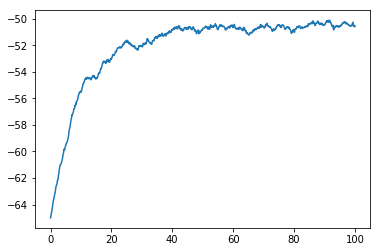

In [4]:
import numpy as np
import pylab as pl

tau_m=10.0
Rm=10.0
El=Vr=-65.0
Vth=-50.0

T=100.0
N=1000
dt=float(T/N)

def mu(El,v,tau_m,Rm,Idc): 
    return (El-v+Rm*Idc)/tau_m

def sigma(Rm,tau_m,D, t): 
#     return 0
    return (Rm*D/tau_m)

def dW(delta_t): 
    """Sample a random number at each call."""
    return np.random.normal(loc = 0.0, scale = np.sqrt(delta_t))


V=np.zeros(N)
time= np.linspace(0.0,T,N)
V[0]=-65.0
Idc=1.40
D=.20
spike_traine=[]
for i in range(1,N):
    V[i]=V[i-1] + mu(El,V[i-1],tau_m,Rm,Idc)*dt + sigma(Rm,tau_m,D, time[i])*dW(dt)
    if V[i]>Vth:
        V[i]=Vr
        spike_traine.append(time[i])

pl.figure(1)
pl.plot(time,V)
pl.vlines(spike_traine,Vth,Vth+10)

36
80


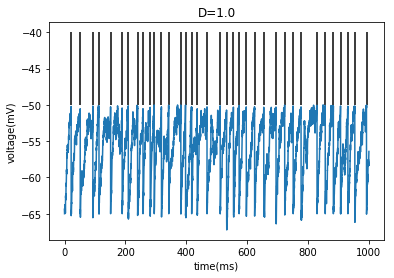

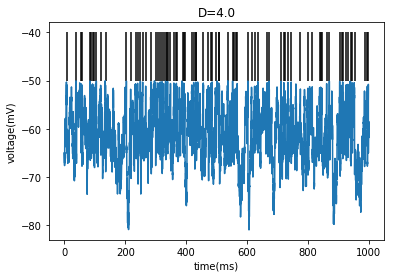

In [38]:
import numpy as np
import pylab as pl

tau_m=10.0
Rm=10.0
El=Vr=-65.0
Vth=-50.0

T=1000.0
N=10000
dt=float(T/N)

def mu(El,v,tau_m,Rm,Idc): 
    return (El-v+Rm*Idc)/tau_m

def sigma(Rm,tau_m,D, t): 
#     return 0
    return (Rm*D/tau_m)

def dW(delta_t): 
    """Sample a random number at each call."""
    return np.random.normal(loc = 0.0, scale = np.sqrt(delta_t))


V=np.zeros(N)
time= np.linspace(0.0,T,N)
V[0]=-65.0
Idc=1.50
D=1.0
spike_traine=[]
for i in range(1,N):
    V[i]=V[i-1] + mu(El,V[i-1],tau_m,Rm,Idc)*dt + sigma(Rm,tau_m,D, time[i])*dW(dt)
    if V[i]>Vth:
        V[i]=Vr
        spike_traine.append(time[i])

print len(spike_traine)
pl.figure(1)
pl.title("D=1.0")
pl.xlabel("time(ms)")
pl.ylabel("voltage(mV)")
pl.plot(time,V)
pl.vlines(spike_traine,Vth,Vth+10)

D=4.0
spike_traine=[]
for i in range(1,N):
    V[i]=V[i-1] + mu(El,V[i-1],tau_m,Rm,Idc)*dt + sigma(Rm,tau_m,D, time[i])*dW(dt)
    if V[i]>Vth:
        V[i]=Vr
        spike_traine.append(time[i])

print len(spike_traine)
pl.figure(2)
pl.title("D=4.0")
pl.xlabel("time(ms)")
pl.ylabel("voltage(mV)")
pl.plot(time,V)
pl.vlines(spike_traine,Vth,Vth+10)

38


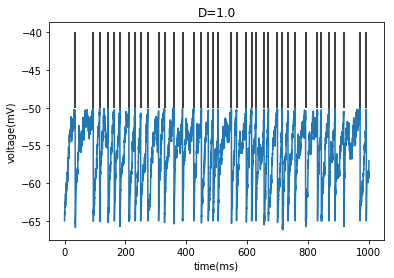

In [54]:
def simulate(T=1000.0,N=int(T*10)):
#     T t_end
#     N number of time step
    import numpy as np    

    tau_m=10.0
    Rm=10.0
    El=Vr=-65.0
    Vth=-50.0
    
    dt=float(T/N)

    def mu(El,v,tau_m,Rm,Idc): 
        return (El-v+Rm*Idc)/tau_m

    def sigma(Rm,tau_m,D, t): 
    #     return 0
        return (Rm*D/tau_m)

    def dW(delta_t): 
        """Sample a random number at each call."""
        return np.random.normal(loc = 0.0, scale = np.sqrt(delta_t))

    V=np.zeros(N)
    time= np.linspace(0.0,T,N)
    V[0]=-65.0
    Idc=1.50
    D=1.0
    spike_traine=[]
    for i in range(1,N):
        V[i]=V[i-1] + mu(El,V[i-1],tau_m,Rm,Idc)*dt + sigma(Rm,tau_m,D, time[i])*dW(dt)
        if V[i]>Vth:
            V[i]=Vr
            spike_traine.append(time[i])
    return time,V,spike_traine
            
time,V,spike_traine=simulate()
print len(spike_traine)
pl.figure(1)
pl.title("D=1.0")
pl.xlabel("time(ms)")
pl.ylabel("voltage(mV)")
pl.plot(time,V)
pl.vlines(spike_traine,Vth,Vth+10)


1708
2252
2925
3906
5649


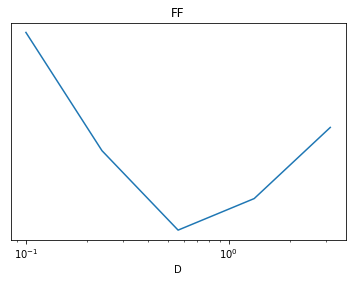

In [34]:
def simulate(T=1000.0,dt=0.1,D=0.0):
#     T t_end
#     N number of time step
    import numpy as np    

    tau_m=10.0
    Rm=10.0
    El=Vr=-65.0
    Vth=-50.0
    N=int(T/dt)
#     dt=float(T/N)

    def mu(El,v,tau_m,Rm,Idc): 
        return (El-v+Rm*Idc)/tau_m

    def sigma(Rm,tau_m,D, t): 
    #     return 0
        return (Rm*D/tau_m)

    def dW(delta_t): 
        """Sample a random number at each call."""
        return np.random.normal(loc = 0.0, scale = np.sqrt(delta_t))

    V=np.zeros(N)
    time= np.linspace(0.0,T,N)
    V[0]=-65.0
    Idc=1.49
    spike_traine=[]
    for i in range(1,N):
        V[i]=V[i-1] + mu(El,V[i-1],tau_m,Rm,Idc)*dt + sigma(Rm,tau_m,D, time[i])*dW(dt)
        if V[i]>Vth:
            V[i]=Vr
            spike_traine.append(time[i])
    return time,V,spike_traine,Vth
def fano_factor(time_seri):
    import numpy as np
    return np.var(time_seri)/np.mean(time_seri)

import numpy as np
D_array=np.logspace(-1,.5,5)
FF_array=np.zeros(len(D_array))
for i in range(len(D_array)):
    time,V,spike_traine,Vth=simulate(T=100000.,dt=1.,D=D_array[i])
    print len(spike_traine)
    FF=fano_factor(spike_traine)
    FF_array[i]=FF

import pylab as pl
pl.figure(1)
pl.title("FF")
pl.xlabel("D")
# pl.ylabel("FF")
pl.loglog(D_array,FF_array)
# pl.vlines(spike_traine,Vth,Vth+10)

    
# print len(spike_traine)
# print N
# import pylab as pl
# pl.figure(1)
# pl.title("D=1.0")
# pl.xlabel("time(ms)")
# pl.ylabel("voltage(mV)")
# pl.plot(time,V)
# pl.vlines(spike_traine,Vth,Vth+10)


492
549
622
716
772
888
986
1101
1268
1422
1683
1984
2301
2746
3215


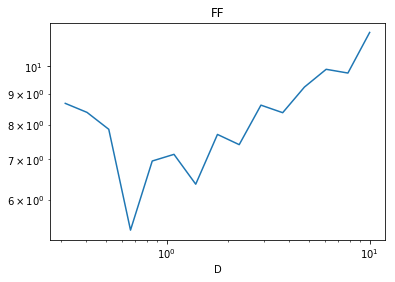

In [35]:
def simulate(T=1000.0,dt=0.1,D=0.0):
#     T t_end
#     N number of time step
    import numpy as np    

    tau_m=10.0
    Rm=10.0
    El=Vr=-65.0
    Vth=-50.0
    N=int(T/dt)
#     dt=float(T/N)

    def mu(El,v,tau_m,Rm,Idc): 
        return (El-v+Rm*Idc)/tau_m

    def sigma(Rm,tau_m,D, t): 
    #     return 0
        return (Rm*D/tau_m)

    def dW(delta_t): 
        """Sample a random number at each call."""
        return np.random.normal(loc = 0.0, scale = np.sqrt(delta_t))

    V=np.zeros(N)
    time= np.linspace(0.0,T,N)
    V[0]=-65.0
    Idc=1.45
    spike_traine=[]
    for i in range(1,N):
        V[i]=V[i-1] + mu(El,V[i-1],tau_m,Rm,Idc)*dt + sigma(Rm,tau_m,D, time[i])*dW(dt)
        if V[i]>Vth:
            V[i]=Vr
            spike_traine.append(time[i])
    return time,V,spike_traine,Vth
def fano_factor(time_seri):
    import numpy as np
    return np.var(time_seri)/np.mean(time_seri)

import numpy as np
# D_array=np.linspace(0.13,10.,15)
D_array=np.logspace(-.50,1.0,15)
FF_array=np.zeros(len(D_array))
for i in range(len(D_array)):
    time,V,spike_traine,Vth=simulate(T=25000.,dt=.1,D=D_array[i])
    isi=np.zeros(len(spike_traine)-1)
    for j in range(len(spike_traine)-1):
        isi[j]=spike_traine[j+1]-spike_traine[j]
#     pl.figure(i)
#     pl.plot(time,V)
    print len(spike_traine)
    FF=fano_factor(isi)
    FF_array[i]=FF

import pylab as pl
pl.figure(100)
pl.title("FF")
pl.xlabel("D")
# pl.ylabel("FF")
pl.loglog(D_array,FF_array)
# pl.vlines(spike_traine,Vth,Vth+10)

    
# print len(spike_traine)
# print N
# import pylab as pl
# pl.figure(1)
# pl.title("D=1.0")
# pl.xlabel("time(ms)")
# pl.ylabel("voltage(mV)")
# pl.plot(time,V)
# pl.vlines(spike_traine,Vth,Vth+10)


In [ ]:
# todo: antegral giri baraye zamane toolani tar 
#    va motevaset giri 
#    va say dar peyda kardane damane motegharen
